In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [5]:
import warnings

warnings.filterwarnings(action='ignore') 

In [6]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare_edit.csv'
hos = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
die = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망자수_십만명당.csv'

### healthcare 데이터

In [7]:
df = pd.read_csv(healthcare)

In [8]:
df.columns

Index(['Unnamed: 0', '가입자 일련번호', '연령대코드', '시도코드', '서식코드', '진료과목코드', '주상병코드',
       '입내원일수', '심결가산율', '심결요양급여비용총액'],
      dtype='object')

In [9]:
df_hos = df.groupby('시도코드')['심결가산율'].value_counts().to_frame()
df_hos

심결가산율
시도코드 심결가산율         
11   0.15   1846200
     0.30    181296
     0.25    179823
     0.20    154289
     0.00      8128
...             ...
39   0.15    143777
     0.25     27569
     0.20      5122
     0.30      2232
     0.00       555

[85 rows x 1 columns]

### 병원 데이터

In [10]:
hospital =pd.read_csv(hos)
a_die = pd.read_csv(die)

In [11]:
hospital.columns

Index(['Unnamed: 0', '시도코드', '시도명', '십만명당 회피가능사망율', '총 인구', '주민등록인구', '의료인수합계',
       '의사', '간호사', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수',
       '요양기관합계', '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수'],
      dtype='object')

* 산점도
  - 의료인 수와 요양기관수
     - 요양기관이 많을 수록 의료인수가 많다 (양의 상관관계)

In [13]:
X = hospital['천명당 요양기관수'].values
Y = hospital['천명당 의료인수'].values

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


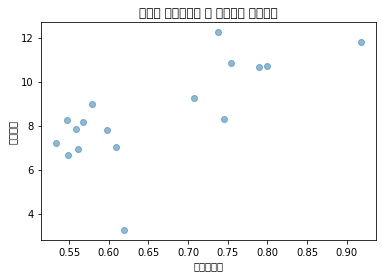

In [14]:
plt.scatter(X,Y, alpha=0.5)
plt.title('천명당 요양기관수 와 의료인수 상관관계')
plt.xlabel('요양기관수')
plt.ylabel('의료인수')
plt.show()

* 지역별 요양원수 현황 
  - 의원이 비율이 크고, 병원수는 인구수와 거의 비례함
    - 우리가 구하고자 하는 결과와 큰 영향이 없어보임
      - ⏭ 각 요양원별 십만명당 회피가능 사망율의 관계를 파악해보고자함 

In [15]:
hoss = hospital[['시도명', '상급종합병원', '종합병원', '병원', '의원']].set_index('시도명')

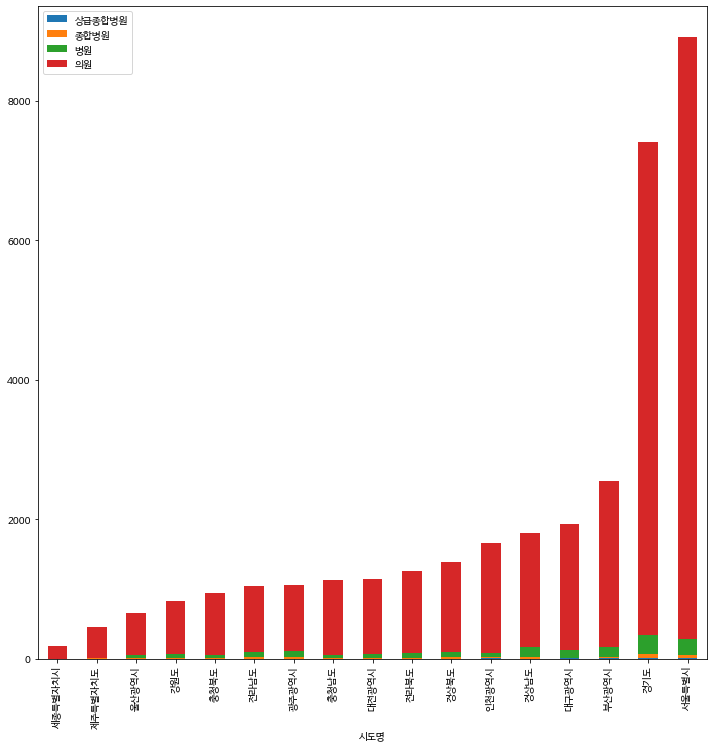

In [ ]:
hoss.sort_values(by='의원').plot(kind="bar",stacked=True,figsize=(12,12))

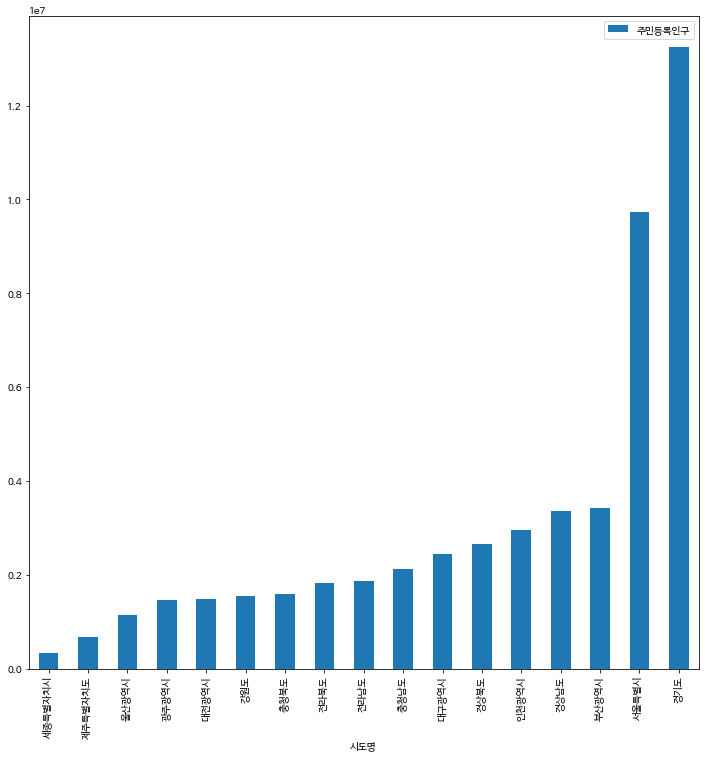

In [ ]:
pep = hospital[['시도명', '주민등록인구']].set_index('시도명')
pep.sort_values(by='주민등록인구').plot(kind="bar", figsize=(12,12))

### 요양원별 회피가능사망율의 상관관계 분석 

* 십만명당 회피가능사망율 - 종합병원수가 그나마 높은 상관관계를 보인다 
  - 사망율 - 상급 + 종합병원 수에서 높은 상관관계를 보임 

예측
- 상급 + 종합병원에는 중증환자 비율이 높다. 
- 또한 상급, 종합병원이 없는 지역에서 유입되는 환자수가 있어 종종 대기 시간이 발생함. 
- 이로인해 해당 기관의 의료인 수가 부족할 수도 있을듯 하다? 

추가 분석 필요 ⏭
- 기관별 의료인수 (지역별 의료인수) 
- 타 지역에서 상급 또는 종합병원을 방문하는 비율 

In [16]:
hospital['천명당 상급종합병원수'] = hospital['상급종합병원'] / hospital['주민등록인구'] * 1000
hospital['천명당 종합병원수'] = hospital['종합병원'] / hospital['주민등록인구'] * 1000
hospital['천명당 병원수'] = hospital['병원'] / hospital['주민등록인구'] * 1000
hospital['천명당 의원수'] = hospital['의원'] / hospital['주민등록인구'] * 1000
hospital.columns

Index(['Unnamed: 0', '시도코드', '시도명', '십만명당 회피가능사망율', '총 인구', '주민등록인구', '의료인수합계',
       '의사', '간호사', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '병상수합계', '천명당 병상수',
       '요양기관합계', '상급종합병원', '종합병원', '병원', '의원', '천명당 요양기관수', '천명당 상급+종합병원수',
       '천명당 상급종합병원수', '천명당 종합병원수', '천명당 병원수', '천명당 의원수'],
      dtype='object')

In [17]:
hospitals = hospital [['시도코드', '십만명당 회피가능사망율', '천명당 상급+종합병원수', '천명당 상급종합병원수', '천명당 종합병원수', '천명당 병원수', '천명당 의원수']]

In [18]:
hospitals = hospitals.set_index('시도코드')
del a_die['Unnamed: 0']
a_die = a_die.set_index('시도코드')

In [19]:
hos_die = hospitals.join(a_die)
hos_die.head()

,십만명당 회피가능사망율,천명당 상급+종합병원수,천명당 상급종합병원수,천명당 종합병원수,천명당 병원수,천명당 의원수,시도명,십만명당 회피가능사망자수
시도코드,,,,,,,,
11,66.496942,0.005859,0.001336,0.004523,0.023435,0.886823,서울특별시,66.5
21,86.370176,0.008495,0.001172,0.007323,0.041595,0.698334,부산광역시,86.4
22,61.359540,0.006563,0.002051,0.004512,0.044708,0.739531,대구광역시,61.4
23,65.645136,0.006425,0.001015,0.005411,0.020967,0.531953,인천광역시,65.6
24,60.682137,0.015792,0.001373,0.014418,0.054927,0.650890,광주광역시,60.7


In [20]:
hos_die.to_csv('병원.csv')

In [ ]:
hos_die.corr(method='pearson')

,십만명당 회피가능사망율,천명당 상급+종합병원수,천명당 상급종합병원수,천명당 종합병원수,천명당 병원수,천명당 의원수,십만명당 회피가능사망자수
십만명당 회피가능사망율,1.000000,0.466354,-0.078954,0.491531,0.212946,-0.299799,0.999999
천명당 상급+종합병원수,0.466354,1.000000,0.195504,0.980042,0.642451,-0.017321,0.466347
천명당 상급종합병원수,-0.078954,0.195504,1.000000,-0.003350,0.536739,0.573559,-0.078896
천명당 종합병원수,0.491531,0.980042,-0.003350,1.000000,0.546292,-0.133922,0.491513
천명당 병원수,0.212946,0.642451,0.536739,0.546292,1.000000,0.165216,0.212892
천명당 의원수,-0.299799,-0.017321,0.573559,-0.133922,0.165216,1.000000,-0.299640
십만명당 회피가능사망자수,0.999999,0.466347,-0.078896,0.491513,0.212892,-0.299640,1.000000


### 기관별, 시도별 의료인수 

* 의료인수와 회피가능사망률 확인 
  - 지역별 의료인 수는 큰 상관관계를 보이지 않음 

In [ ]:
hos_emp = hospital[['십만명당 회피가능사망율','천명당 의료인수', '천명당 의사수', '천명당 간호사수']]
hos_emp

,십만명당 회피가능사망율,천명당 의료인수,천명당 의사수,천명당 간호사수
0,66.496942,11.805914,3.120430,5.419511
1,86.370176,10.846434,2.345745,5.423217
2,61.359540,10.700028,2.423267,5.150468
3,65.645136,8.143655,1.714899,3.936049
4,60.682137,12.245377,2.511555,6.144316
5,55.576349,10.676195,2.526324,4.849919
6,52.723985,7.796038,1.527849,4.017355
7,37.854591,3.256258,0.886736,0.645966
8,59.492215,6.927894,1.602004,2.998112
9,120.779382,7.859218,1.763864,3.920203


In [ ]:
hos_emp.corr()

,십만명당 회피가능사망율,천명당 의료인수,천명당 의사수,천명당 간호사수
십만명당 회피가능사망율,1.000000,0.051419,-0.108371,0.152809
천명당 의료인수,0.051419,1.000000,0.935712,0.976004
천명당 의사수,-0.108371,0.935712,1.000000,0.849739
천명당 간호사수,0.152809,0.976004,0.849739,1.000000


* 지역별 의료인력 데이터 가져오기

In [ ]:
emp = pd.read_csv('employees.csv')
emp.tail()

,시도,요양기관종별,의사계,간호사계
75,제주,병원,38,214
76,제주,의원,570,448
77,세종,소계,302,220
78,세종,종합병원,16,58
79,세종,의원,259,65


In [ ]:
hosp = hospital.groupby('시도코드')[['상급종합병원', '종합병원', '병원', '의원']].sum()
print(hosp['상급종합병원'].sum())
print(hosp['종합병원'].sum())
print(hosp['병원'].sum())
print(hosp['의원'].sum())

42
314
1489
32491


* 요양기관종별 의료인력 현황 

In [ ]:
first = emp.groupby('요양기관종별')[['의사계','간호사계']].sum()
first

,의사계,간호사계
요양기관종별,,
병원,10957,34449
상급종합병원,21437,54206
소계,105628,215293
의원,43576,15530
종합병원,21251,73594


In [ ]:
first.loc['소계']['의사계']

105628.0

In [ ]:
first['의사비율'] = first['의사계'] / first.loc['소계']['의사계']
first['간호사 비율'] = first['간호사계'] / first.loc['소계']['간호사계']

In [ ]:
first = first.drop('소계', axis = 0)

In [ ]:
first

,의사계,간호사계,의사비율,간호사 비율
요양기관종별,,,,
병원,10957,34449,0.103732,0.160010
상급종합병원,21437,54206,0.202948,0.251778
의원,43576,15530,0.412542,0.072134
종합병원,21251,73594,0.201187,0.341832


* 병원종별 의사 비율 
  - 전체 의료 인력중 상급종합병원 + 종합병원에 인력이 치중되어있음 
  - 큰 병원이 없는 지역의 중증환자 치료는? 

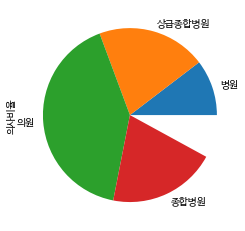

In [ ]:
# 의원 > 상급종합병원 > 종합병원 > 병원 
first['의사비율'].plot.pie()

* 병원종별 간호사 비율 

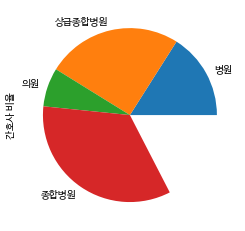

In [ ]:
# 종합병원 > 상급종합병원 > 병원 > 의원 
first['간호사 비율'].plot.pie()